In [1]:
import astropy.io.fits as pf
import pylab as mplot
%pylab inline

mplot.rc('text', usetex=True)
mplot.rc('font', family='serif')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
infile = pf.open('/project/chihway/chihway/CosmicShearCosmosis/datavectors/data_04052024_BLINDED.fits')

In [3]:
infile.info()

Filename: /project/chihway/chihway/CosmicShearCosmosis/datavectors/data_04052024_BLINDED.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  COVMAT        1 ImageHDU        13   (400, 400)   float64   
  2  xip           1 BinTableHDU     37   200R x 7C   [K, K, K, D, D, D, D]   
  3  xim           1 BinTableHDU     37   200R x 7C   [K, K, K, D, D, D, D]   
  4  nz_source     1 BinTableHDU     24   50R x 7C   [D, D, D, D, D, D, D]   


In [4]:
infile['xip'].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   56 / length of dimension 1                          
NAXIS2  =                  200 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    7 / number of table fields                         
2PTDATA =                    T                                                  
EXTNAME = 'xip     '                                                            
QUANT1  = 'G+R     '                                                            
QUANT2  = 'G+R     '                                                            
KERNEL_1= 'nz_source'       

In [5]:
infile['xip'].data['value'][:20]

array([1.52870897e-04, 8.67328875e-05, 7.39051141e-05, 6.60332244e-05,
       5.55121490e-05, 3.94173205e-05, 3.57382194e-05, 2.76797425e-05,
       1.96615555e-05, 1.60569020e-05, 1.09973831e-05, 8.29590286e-06,
       6.26154819e-06, 4.64151881e-06, 3.32490071e-06, 2.25283347e-06,
       1.54727521e-06, 1.02439986e-06, 7.08168204e-07, 3.59969392e-07])

In [6]:
infile['COVMAT'].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  400                                                  
NAXIS2  =                  400                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
COVDATA =                    T                                                  
EXTNAME = 'COVMAT  '                                                            
STRT_0  =                    0                                                  
NAME_0  = 'xip     '                                                            
STRT_1  =                  200                                                  
NAME_1  = 'xim     '        

/home/chihway/ipykernel_1919376/2303260815.py:19: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  ax[i][j].errorbar(theta_xip, theta_xip*xip, theta_xip*xip_err, color='g', lw=1, marker='.', fmt='.', capthick=0.8, capsize=2.2, zorder=3)


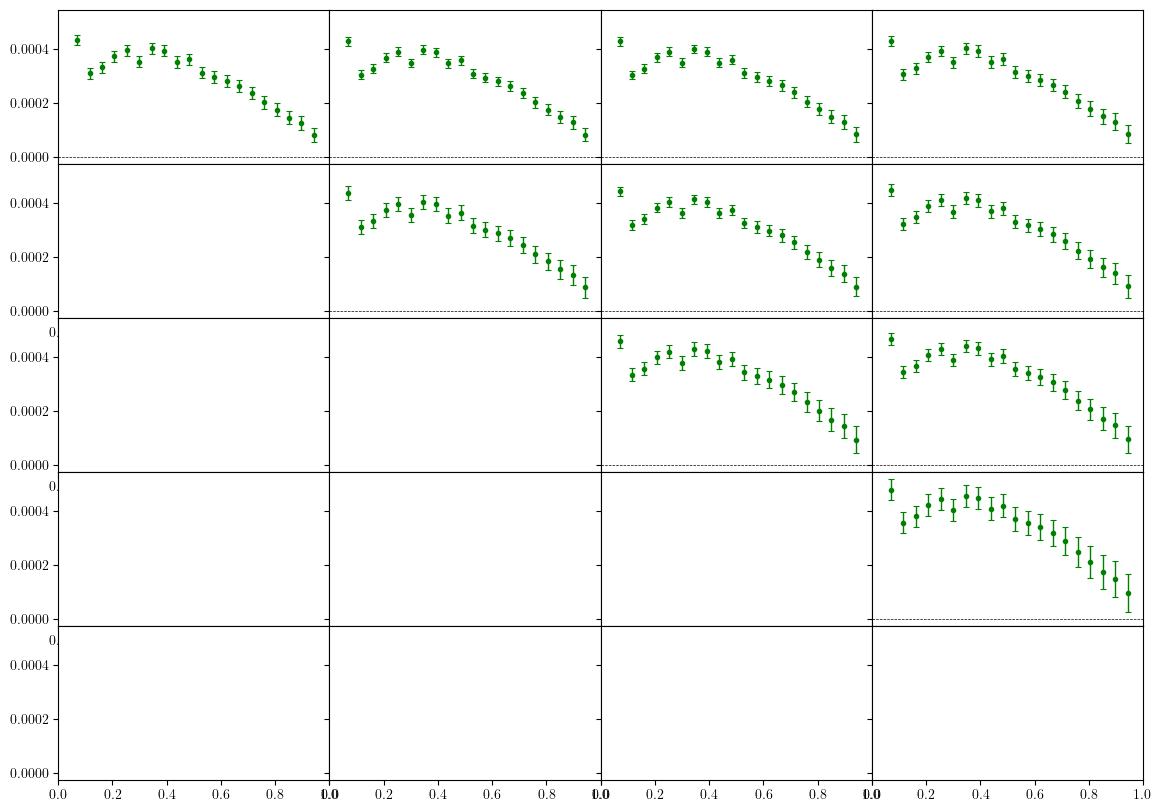

In [7]:
fig, ax = plt.subplots(5,4, sharey=True, figsize=(14,10))
fig.subplots_adjust(wspace=0.0, hspace=0.0)

n=0
for i in range(4):
    for j in range(4):
        if j>=i:

            mask = (infile['xip'].data['BIN1']==i+1)*(infile['xip'].data['BIN2']==j+1)
            theta_xip = infile['xip'].data['ANG'][mask]
            xip = infile['xip'].data['VALUE'][mask]
            xip_err = np.diag(infile['COVMAT'].data)[n*20:(n+1)*20]**0.5
            
            mask = (infile['xim'].data['BIN1']==i+1)*(infile['xim'].data['BIN2']==j+1)
            theta_xim = infile['xim'].data['ANG'][mask]
            xim = infile['xim'].data['VALUE'][mask]
            xim_err = np.diag(infile['COVMAT'].data)[200+n*20:200+(n+1)*20]**0.5
            
            ax[i][j].errorbar(theta_xip, theta_xip*xip, theta_xip*xip_err, color='g', lw=1, marker='.', fmt='.', capthick=0.8, capsize=2.2, zorder=3)
            ax[i][j].set_xscale('log')
            ax[i][j].set_xlim(2,300)
            # ax[i][j].set_ylim(-0.025,0.05)
            
            
            ax[i][j].set_xlabel('$\\theta$ (arcmin)', fontsize=12) 
            ax[i][j].plot([2,300],[0,0], color='k', lw=0.5, ls='--')
        
        
            
            # if i==0:
            #     ax[i].set_ylabel('$\\theta \\times \langle \\delta_{\\rm g} \\kappa_{\\rm CMB}\\rangle$', fontsize=12) 
            #     ax[i].text(3,-0.02, 'DES $\\times$ ACT')
        
            #     frame1 = plt.gca()
            #     for xlabel_i in ax[i].get_yticklabels():
            #         xlabel_i.set_fontsize(0.0)
            #         xlabel_i.set_visible(False)
            n+=1